In [1]:
import pandas as pd
from os import listdir
from os.path import join
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
import random
from statistics import median
from statistics import mean
from statistics import mode
from os import listdir

#store_dir = 'data/ExtendedRRF_without_recency/'
store_dir = 'data/extendedAdversityFusionSept2020'

In [2]:
#input_path = "data/synoymsWithoutIncExcRelevancySorted_Sept2020"
input_path = "data/ExtendedRRF_without_recency/"
files = listdir(input_path)
numberOfTrialsInEachQueryList = []
for file in files:
    df = pd.read_csv(join(input_path, file),encoding='latin1')
    numberOfTrialsInEachQueryList.append(df.shape[0])
    
print(sorted(numberOfTrialsInEachQueryList))
print("Median:", median(numberOfTrialsInEachQueryList))
print("Mean:", mean(numberOfTrialsInEachQueryList))
print("Min:", min(numberOfTrialsInEachQueryList))
print("Max:", max(numberOfTrialsInEachQueryList))
# print("Mode:", mode(numberOfTrialsInEachQueryList))

[16, 20, 24, 24, 25, 25, 27, 41, 51, 52, 66, 67, 68, 71, 72, 73, 93, 95, 103, 115, 126, 284, 434, 436, 456]
Median: 68
Mean: 114.56
Min: 16
Max: 456


In [3]:
def plotbar(y, x_lab, y_lab, title):
    objects = ('Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25')
    y_mean = [np.median(y)]*len(y)
    
    y_pos = np.arange(len(objects))
    
    plt.figure(figsize=(15, 3))
    plt.bar(y_pos, y, align='center', alpha=0.5, color='b')
    
    plt.xticks(y_pos, objects)
    
    # Plot the average line
    plt.plot(y_pos, y_mean, label='Mean', linestyle='--')
    
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)
    
    plt.show()
    plt.savefig("Number of Trials At each Query")
    print("Median:", y_mean[0])

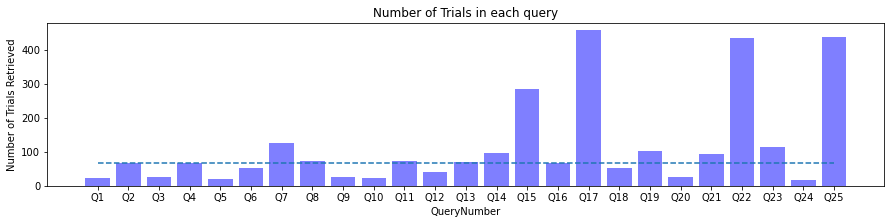

Median: 68.0


<Figure size 432x288 with 0 Axes>

In [4]:
plotbar(numberOfTrialsInEachQueryList, "QueryNumber", "Number of Trials Retrieved", "Number of Trials in each query")

In [5]:
for file in files:
#   print(file)
    df = pd.read_csv(join(input_path, file), encoding='latin1')

    df['tot_subj_affected'] = df['tot_subj_affected'].fillna(value=0)
    df['citationSum'] = df['citationSum'].fillna(value=0)

#   rel_index = df.sort_values(by=['brief_summary_matched_count', 'official_title_matched_count', 'brief_title_matched_count', 'briefTitleAndSummaryCombinedPageRankScore'], ascending=[False, False, False, False]).index.tolist()
    rel_index = df.index.tolist()
    num_retrieved_trials = len(rel_index)

    df_a = df.sample(frac=1.0, random_state=50)
    adv_index = df_a.sort_values(by=['tot_subj_affected', 'briefTitleAndSummaryCombinedPageRankScore'], ascending=[True, False]).index.tolist()
    #rec_index = df.sort_values(by=['CompletionDate'], ascending=[False]).index.tolist()
    pop_index_sum = df.sort_values(by=['citationSum'], ascending=[False]).index.tolist()
    pop_index_avg = df.sort_values(by=['citationAvg'], ascending=[False]).index.tolist()
    
    #rank_fusion_score = list()
    rank_fusion_not_recency_score = list()
    k_const = min(len(rel_index), 60)
    
    for list_ind in range(len(rel_index)):
        #sum_score = 1/(k_const + rel_index[list_ind] + 1) + 1/(k_const + adv_index[list_ind] + 1) + 1/(k_const + rec_index[list_ind] + 1) + 1/(k_const + pop_index_sum[list_ind] + 1)
        #rank_fusion_score.append(sum_score)
        sum_some_score = 1/(k_const + rel_index[list_ind] + 1) + 1/(k_const + adv_index[list_ind] + 1) + 1/(k_const + pop_index_sum[list_ind] + 1)
        rank_fusion_not_recency_score.append(sum_some_score)
    
    #df['RRFscore_all_aspects'] = rank_fusion_score
    df['RRFscore_not_recency'] = rank_fusion_not_recency_score
    
    
    #df_fused_index = df.sort_values(by=['RRFscore_all_aspects'], ascending=[False]).index.tolist()
    df_fused_not_recency_index = df.sort_values(by=['RRFscore_not_recency'], ascending=[False]).index.tolist()
    
    print('Query name: ', file)
    print('Ground truth relevance: ', df['relevance'].tolist())
    print('Relevancy: ', rel_index)
    print('Adversity: ', adv_index)
    #print('Recency: ', rec_index)
    print('Popularity: ', pop_index_sum)
    #print('Combined RRF All Aspects: ', df_fused_index)
    print('Combined RRF Not recency: ', df_fused_not_recency_index)
    print()
    #df_fused = df.sort_values(by=['RRFscore_all_aspects'], ascending=[False])
    #df_fused = df.sort_values(by=['RRFscore_not_recency'], ascending=[False])
    df_fused = df.sort_values(by=['tot_subj_affected', 'RRFscore_not_recency'], ascending=[True, False])
    df_fused.to_csv(join(store_dir, file), index=False)


Query name:  already having Celiac Disease_ext_page_rank_24.csv
Ground truth relevance:  [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 1, -1]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Adversity:  [4, 0, 5, 2, 7, 9, 1, 3, 6, 12, 8, 10, 13, 11, 17, 16, 15, 20, 22, 19, 18, 21, 14, 23]
Popularity:  [23, 8, 22, 3, 15, 21, 0, 4, 7, 2, 16, 1, 11, 9, 19, 17, 20, 6, 18, 13, 5, 14, 10, 12]
Combined RRF Not recency:  [6, 1, 3, 7, 0, 11, 8, 9, 2, 4, 5, 13, 10, 12, 20, 17, 22, 15, 14, 19, 16, 21, 23, 18]

Query name:  antiretroviral therapy first time_ext_page_rank_68.csv
Ground truth relevance:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, -1, 1, -1, 0, 0, 1, 0, 0, 1, -1, -1, 0, 0, -1, -1, -1, -1, 0, 0, -1, 0, 0, -1, -1, 1, 0, 0, -1, 0, 0, -1, -1, -1, 0, -1, -1, 1, 0, 0, 1, 0, 1, 0]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 

Query name:  managing constipation in children_ext_page_rank_95.csv
Ground truth relevance:  [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, -1, -1, 0, 0, -1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 1, -1, -1, 0, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
Adversity:  [23, 46, 47, 36, 56, 14, 33, 69, 15, 34, 43, 4, 74, 39, 17, 37, 78, 29, 86, 5, 0, 21, 73, 92, 88, 87, 12, 11, 1, 65, 64, 93, 50, 90, 6, 70, 16, 76, 82, 32, 84, 72, 28, 2, 52, 9, 3, 7, 61, 40, 66, 8, 18, 42, 63,

Query name:  serious sleep apnea_ext_page_rank_115.csv
Ground truth relevance:  [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, -1, 0, 0, -1, 0, -1, 0, 1, -1, 0, 0, 0, 1, -1, -1, -1, 0, 1, -1, 1, 0, 0, -1, 1, 0, 1, -1, -1, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1, 1, 0, -1, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, -1, 0, 0, -1, 0, -1, 0, 0, -1, 0, -1, -1, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, 0]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
Adversity:  [18, 11, 69, 15, 48, 59, 9, 68, 78, 30, 23, 67, 3